In [157]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

In [8]:
pwd

'/Users/wli17/Documents/GLMM/Simulation_data_GLMM'

In [182]:
LA_files_dirs = glob.glob('Result_LA/*.csv')
GH_files_dirs = glob.glob('Result_GH/*.csv')
R_files_dirs = glob.glob('Result_R/*.csv')

In [21]:
cols = ['Truth', 'Coef', 'Std.Err', 'z', 'P-value', '[0.025', '0.975]']
for d in LA_files_dirs:
    pd.read_csv(d, index_col=0)[cols].to_csv(d, header = True)
for d in GH_files_dirs:
    pd.read_csv(d, index_col=0)[cols].to_csv(d, header = True)

In [183]:
LA_result = []
GH_result = []
R_result = []
for d in LA_files_dirs:
    LA_result.append(d.split('/')[1])
for d in GH_files_dirs:
    GH_result.append(d.split('/')[1])
for d in R_files_dirs:
    R_result.append(d.split('/')[1])

In [41]:
import fnmatch

In [188]:
filtered = fnmatch.filter(GH_result, 'Setting_4*')
success = []
s = [str(i+1) for i in range(20)]
for l in filtered:
    success.append(l[10:].split('.')[0])
failed = set(s).difference(set(success))
print(len(failed), success)

20 []


In [98]:
df = (pd.read_csv('Result_R/' + LA_result[0], index_col=0) - pd.read_csv('Result_LA/' + LA_result[0], index_col=0))['Coef']

In [95]:
pd.read_csv('Result_LA/' + LA_result[0], index_col=0)

,Truth,Coef,Std.Err,z,P-value,[0.025,0.975]
X1,-1.50,-1.084646,0.220181,-4.926155,8.386365e-07,-1.516193,-0.653099
X2,0.10,-0.081002,0.512997,-0.157899,8.745364e-01,-1.086458,0.924454
X3,-0.50,-0.503023,0.339758,-1.480532,1.387314e-01,-1.168937,0.162891
X4,-0.30,0.020968,0.283014,0.074088,9.409403e-01,-0.533730,0.575666
X5,0.40,0.672402,0.288204,2.333082,1.964384e-02,0.107534,1.237271
X6,-0.20,-0.118359,0.138840,-0.852481,3.939469e-01,-0.390481,0.153763
X7,-0.25,-0.200636,0.099388,-2.018715,4.351690e-02,-0.395433,-0.005839
X8,0.35,-0.360902,0.484789,-0.744451,4.566035e-01,-1.311070,0.589267
X9,-0.10,-0.268979,0.358411,-0.750476,4.529681e-01,-0.971453,0.433494
X10,0.50,0.215124,0.244190,0.880969,3.783344e-01,-0.263480,0.693728


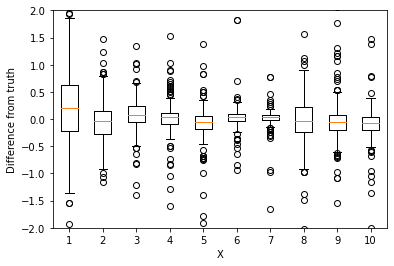

In [202]:
R_coef = pd.DataFrame()
for f in R_result:
    df = pd.read_csv('Result_R/' + f, index_col=0)['Coef'] - [-1.5,0.1,-0.5,-0.3,0.4,-0.2,-0.25,0.35,-0.1,0.5]
    R_coef = pd.concat([R_coef, df], axis = 1)
R_coef = R_coef.dropna(axis = 1)
plt.ylim(-2, 2)
box = plt.boxplot(R_coef.T)
plt.xlabel('X')
plt.ylabel('Difference from truth')
plt.show()

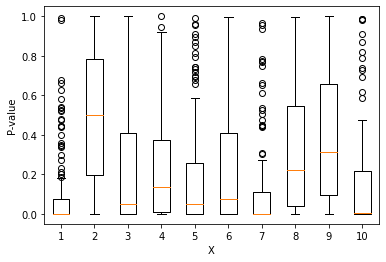

In [199]:
R_coef = pd.DataFrame()
for f in R_result:
    df = pd.read_csv('Result_R/' + f, index_col=0)['P-value']
    R_coef = pd.concat([R_coef, df], axis = 1)
R_coef = R_coef.dropna(axis = 1)
# plt.ylim(0, 1)
box = plt.boxplot(R_coef.T)
plt.xlabel('X')
plt.ylabel('P-value')
plt.show()

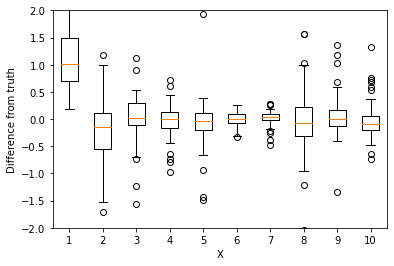

In [210]:
LA_coef = pd.DataFrame()
for f in LA_result:
    df = pd.read_csv('Result_LA/' + f, index_col=0)['Coef'] - [-1.5,0.1,-0.5,-0.3,0.4,-0.2,-0.25,0.35,-0.1,0.5]
    LA_coef = pd.concat([LA_coef, df], axis = 1)
LA_coef = LA_coef.dropna(axis = 1)
plt.ylim(-2, 2)
box = plt.boxplot(LA_coef.T)
plt.xlabel('X')
plt.ylabel('Difference from truth')
plt.show()

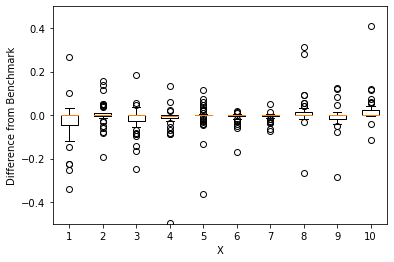

In [211]:
coef_dif = pd.DataFrame()
for f in set(LA_result).intersection(set(R_result)):
    df = (pd.read_csv('Result_R/' + f, index_col=0) - pd.read_csv('Result_LA/' + f, index_col=0))['Coef']
    coef_dif = pd.concat([coef_dif, df], axis = 1)
coef_dif = coef_dif.dropna(axis = 1)
plt.ylim(-0.5, 0.5)
plt.boxplot(coef_dif.T)
plt.xlabel('X')
plt.ylabel('Difference from Benchmark')
plt.show()

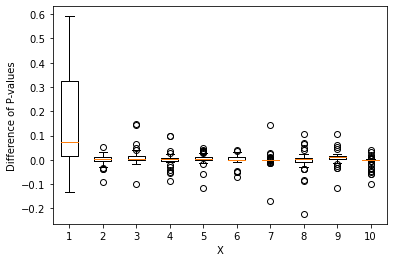

In [212]:
coef_dif = pd.DataFrame()
for f in set(LA_result).intersection(set(R_result)):
    df = (pd.read_csv('Result_R/' + f, index_col=0) - pd.read_csv('Result_LA/' + f, index_col=0))['P-value']
    coef_dif = pd.concat([coef_dif, df], axis = 1)
coef_dif = coef_dif.dropna(axis = 1)
# plt.ylim(-0.5, 0.5)
plt.boxplot(coef_dif.T)
plt.xlabel('X')
plt.ylabel('Difference of P-values')
plt.show()

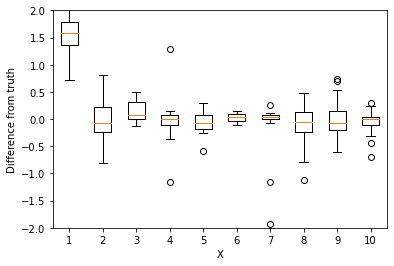

In [213]:
GH_coef = pd.DataFrame()
for f in GH_result:
    df = pd.read_csv('Result_GH/' + f, index_col=0)['Coef'] - [-1.5,0.1,-0.5,-0.3,0.4,-0.2,-0.25,0.35,-0.1,0.5]
    GH_coef = pd.concat([GH_coef, df], axis = 1)
GH_coef = GH_coef.dropna(axis = 1)
plt.ylim(-2, 2)
box = plt.boxplot(GH_coef.T)
plt.xlabel('X')
plt.ylabel('Difference from truth')
plt.show()

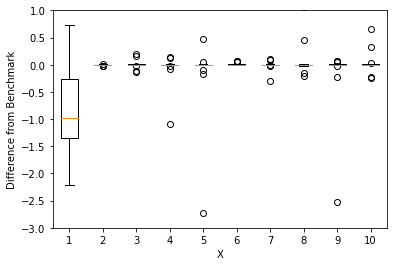

In [214]:
coef_dif = pd.DataFrame()
for f in set(GH_result).intersection(set(R_result)):
    df = (pd.read_csv('Result_R/' + f, index_col=0) - pd.read_csv('Result_GH/' + f, index_col=0))['Coef']
    coef_dif = pd.concat([coef_dif, df], axis = 1)
coef_dif = coef_dif.dropna(axis = 1)
plt.ylim(-3, 1)
plt.boxplot(coef_dif.T)
plt.xlabel('X')
plt.ylabel('Difference from Benchmark')
plt.show()

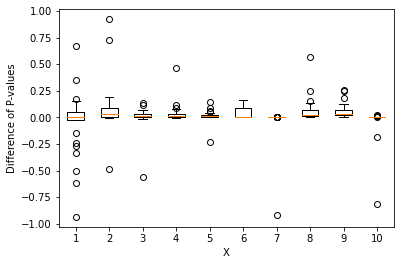

In [215]:
coef_dif = pd.DataFrame()
for f in set(GH_result).intersection(set(R_result)):
    df = (pd.read_csv('Result_R/' + f, index_col=0) - pd.read_csv('Result_GH/' + f, index_col=0))['P-value']
    coef_dif = pd.concat([coef_dif, df], axis = 1)
coef_dif = coef_dif.dropna(axis = 1)
# plt.ylim(-3, 1)
plt.boxplot(coef_dif.T)
plt.xlabel('X')
plt.ylabel('Difference of P-values')
plt.show()

In [216]:
coef_dif

,P-value,P-value,P-value,P-value,P-value,P-value,P-value,P-value,P-value,P-value,...,P-value,P-value,P-value,P-value,P-value,P-value,P-value,P-value,P-value,P-value
X1,-0.334175,0.015946,-0.027460,-0.934853,-2.107750e-03,-5.240222e-07,5.792805e-09,0.177177,0.134522,-0.237780,...,0.049225,-0.269787,1.716385e-02,0.155625,-4.991058e-01,-1.482834e-01,-0.620278,0.046260,4.738899e-02,3.482969e-01
X2,0.003556,0.723805,-0.001505,0.116185,1.763852e-01,4.379334e-03,-4.800330e-01,0.010758,0.013552,0.064261,...,0.089841,0.064461,8.792448e-03,0.010903,6.071317e-03,3.200100e-02,0.055135,0.035746,1.655485e-02,9.224908e-01
X3,0.011822,0.016790,0.016673,0.066330,1.125585e-05,1.057318e-02,-5.565659e-01,0.003120,0.013571,0.014558,...,0.133450,0.067641,-1.051858e-02,0.118799,2.301705e-02,3.332123e-02,0.008001,0.000579,4.841797e-02,8.639531e-03
X4,0.092636,0.035360,0.029560,0.076290,3.577574e-04,1.318478e-02,4.679086e-01,0.000890,0.007319,0.007429,...,0.021461,0.019220,6.566526e-07,0.001282,2.726277e-03,2.088402e-02,0.036112,0.018039,1.886656e-02,1.827867e-02
X5,0.001158,0.001656,0.014734,0.001492,9.068984e-03,3.701709e-02,-2.273417e-01,0.049240,0.002348,0.009429,...,0.007620,0.019690,1.683285e-03,0.084928,1.062025e-02,1.671252e-02,0.028698,0.006019,1.127051e-02,1.463774e-01
X6,0.116824,0.000392,0.000690,0.162572,2.033902e-04,6.397002e-03,2.723122e-04,0.000921,0.014591,0.002609,...,0.122756,0.004571,1.911139e-02,0.098216,4.149987e-03,2.807101e-02,0.042223,0.016094,4.491859e-03,7.352527e-07
X7,0.002658,0.000275,0.000007,0.003007,2.461792e-17,2.063931e-06,-9.151712e-01,0.000605,0.000001,0.000165,...,0.000088,0.000417,4.253967e-04,0.000383,1.137378e-09,7.098342e-08,0.003695,0.000114,3.919990e-07,1.341957e-03
X8,0.012678,0.065825,0.028608,0.103337,1.657900e-02,1.376205e-03,2.469568e-01,0.024143,0.011515,0.002953,...,0.113047,0.005392,2.470823e-02,0.031843,1.349539e-03,1.811604e-02,0.045224,0.006000,1.177167e-02,5.666135e-01
X9,0.117434,0.184965,0.028997,0.004132,6.033576e-02,1.816735e-02,2.448572e-01,0.045814,0.005584,0.019692,...,0.058268,0.028669,2.448203e-02,0.085237,3.236138e-02,1.978204e-02,0.071763,0.007178,2.115033e-02,1.139568e-01
X10,0.003670,0.000009,0.000008,0.000725,9.269791e-17,9.081701e-03,-1.870186e-01,0.000681,0.000004,0.000455,...,0.000329,0.000160,3.507241e-05,0.000021,8.059193e-04,5.010714e-03,0.000475,0.000258,1.902221e-03,-8.103074e-01
